<a href="https://colab.research.google.com/github/21Ovi/BitPredict/blob/main/BitPredict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Time Series forecasting fundamentals with Tensorflow

Writing some TensorFlow code to predict the price of Bitcoin based on the historical price of Bitcoin.

**⚠️Note:** This is not Financial advice.

## Get Data

We're going to be using the historical price data of Bitcoin to try and predict the future price of BitCoin

In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2024-03-04 02:16:35--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.02s   

2024-03-04 02:16:36 (7.21 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



## Importing time series with pandas

In [2]:
# Import with pandas
import pandas as pd

# Let's read in our bitcoin data and patse the dates
df = pd.read_csv('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv',
                 parse_dates=['Date'],
                 index_col=["Date"]) # parse the data column and tell pandas column 1 is a datetime

# Let's take a look at the data
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


We've collected the historical price of Bitcoin from 2013-2021 but there's 2728 samples.

Typically deep learning models usually like lots and lots and lots of samples (where lots and lots and lots can thousands to tens of thsounds to millions).

A smaller number of samples is something you'll often run into with time series data problems.

**Note:** The `seasonality` of a time series dataset is referred as the number of samples per year. So for our Bitcoin data, it has a seasonality of daily of value of 365 because we collect one sample per day meaning we'll get 365 samples per year.

In [4]:
# Only want closing price for each dat
bitcoin_prices = pd.DataFrame(df['Closing Price (USD)']).rename(columns={'Closing Price (USD)': 'price'})

# Let's take a look
bitcoin_prices.head()

,price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


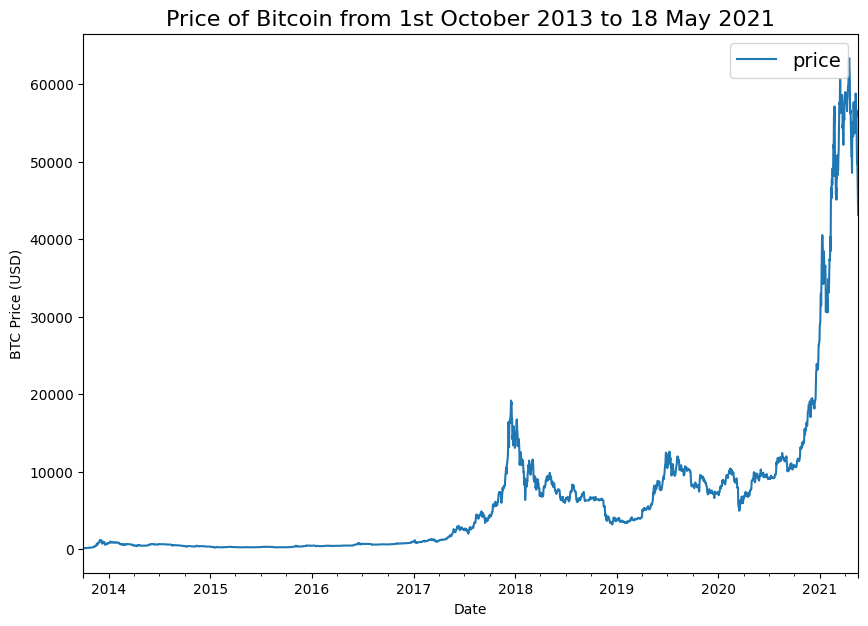

In [5]:
import matplotlib.pyplot as plt

bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel('BTC Price (USD)')
plt.title('Price of Bitcoin from 1st October 2013 to 18 May 2021', fontsize=16)
plt.legend(fontsize=14);

## Import time series data with Python's CSV module

In [6]:
# Importing and formatting historical Bitcoin data with Python
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",") # read in the target CSV
  next(csv_reader) # skip first line (this gets rid of the column titles)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d")) # get the dates as dates (not strings), strptime = string parse time
    btc_price.append(float(line[2])) # get the closing price as float

# View first 10 of each
timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

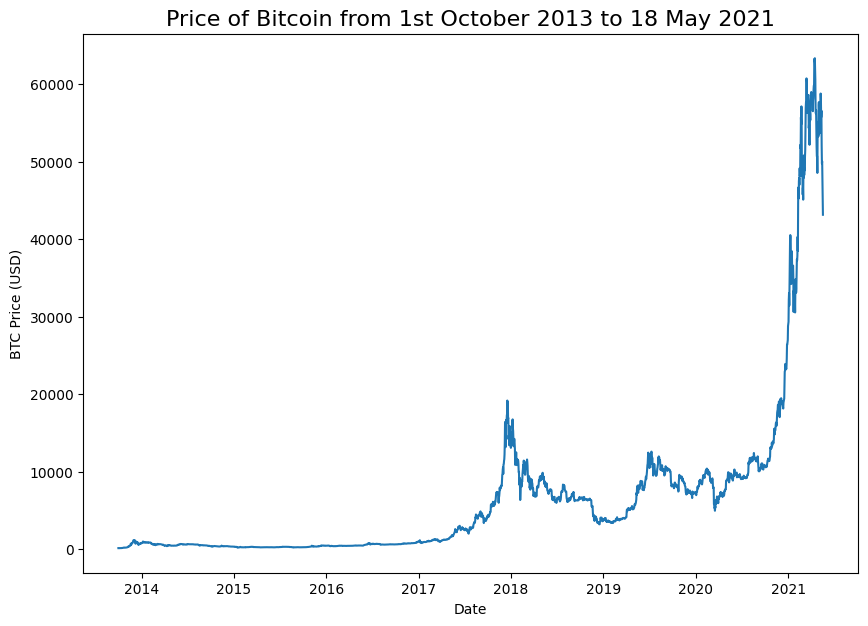

In [7]:
# Plot from CSV
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 7))
plt.plot(timesteps, btc_price)
plt.title('Price of Bitcoin from 1st October 2013 to 18 May 2021', fontsize=16)
plt.ylabel('BTC Price (USD)')
plt.xlabel("Date");

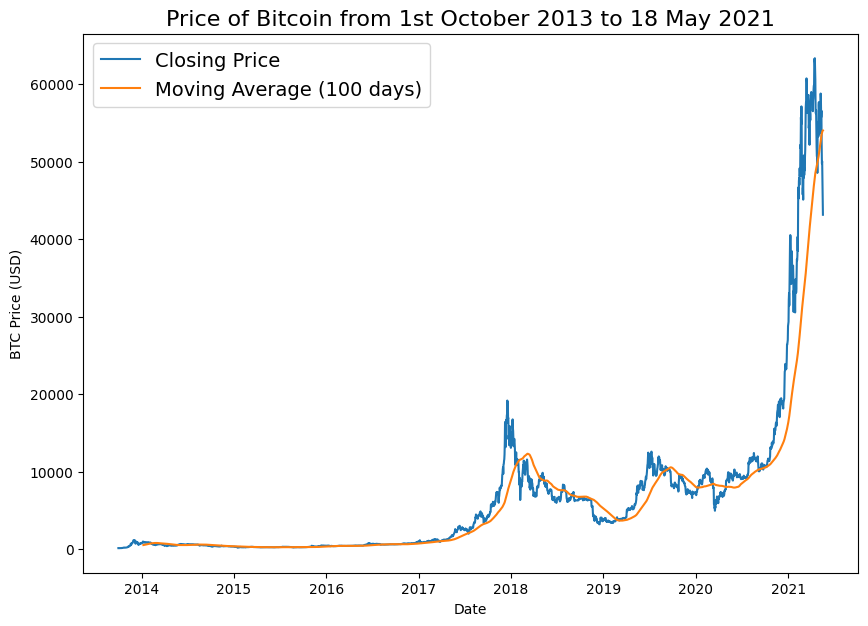

In [8]:
# Plot the closing price with a moving average

plt.figure(figsize=(10, 7))
plt.plot(bitcoin_prices.index, bitcoin_prices['price'], label='Closing Price')
plt.plot(bitcoin_prices.index, bitcoin_prices['price'].rolling(window=100).mean(), label='Moving Average (100 days)')
plt.xlabel('Date')
plt.ylabel('BTC Price (USD)')
plt.title('Price of Bitcoin from 1st October 2013 to 18 May 2021', fontsize=16)
plt.legend(fontsize=14);


## Format data Part 1:  Create train and test sets of our time series data

### Creating train and test sets with time series data (the wrong way)

In [9]:
# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices['price'].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [10]:
# Wrong way to make train/test sets for time series data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(timesteps, prices, test_size=0.2, random_state=42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2229,), (2229,), (558,), (558,))

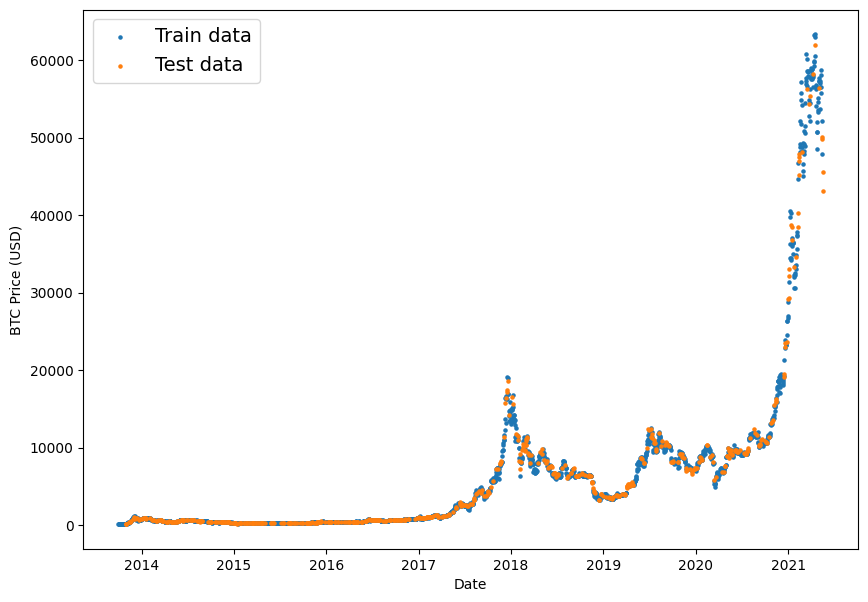

In [11]:
# Let's splot wrong train and test splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train,s=5, label='Train data')
plt.scatter(X_test, y_test,s=5, label='Test data')
plt.xlabel('Date')
plt.ylabel('BTC Price (USD)')
plt.legend(fontsize=14)
plt.show();

### Create train & test sets for time series (the right way)

In [12]:
# Create train and test splits the right way for time series data
split_size = int(0.8 * len(timesteps)) # 80% train, 20% test

# Create train data splits (everything before split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything beyond split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(y_train), len(X_test), len(y_test)

(2229, 2229, 558, 558)

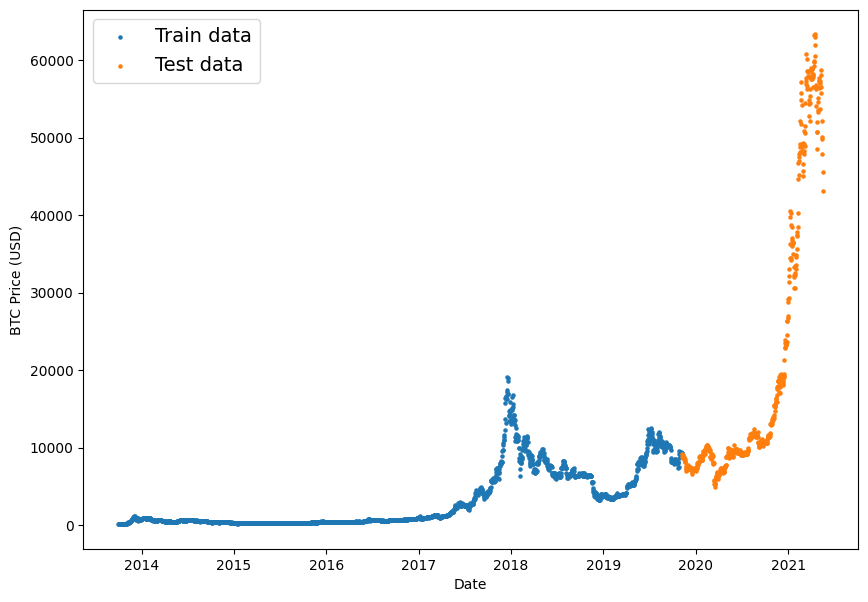

In [13]:
# plot correctly made splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train,s=5, label='Train data')
plt.scatter(X_test, y_test,s=5, label='Test data')
plt.xlabel('Date')
plt.ylabel('BTC Price (USD)')
plt.legend(fontsize=14)
plt.show();

## Create a plotting function

Typing plotting code is tedious, let's functionize it

In [14]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format=".", start=0, end=None, label=None):
  """
  Plots timesteps against values, with the average plotted as a green line.
  parameters:
  ----------
    timesteps: an array of timesteps
    values: an array of values to plot at the timesteps
    format: a string defining the format of the scatter plot points, default is "."
    start: where to start the visualization, default is 0
    end: where to end the visualization, default is None
    label: label to use for the legend, default is None
  """
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Date")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

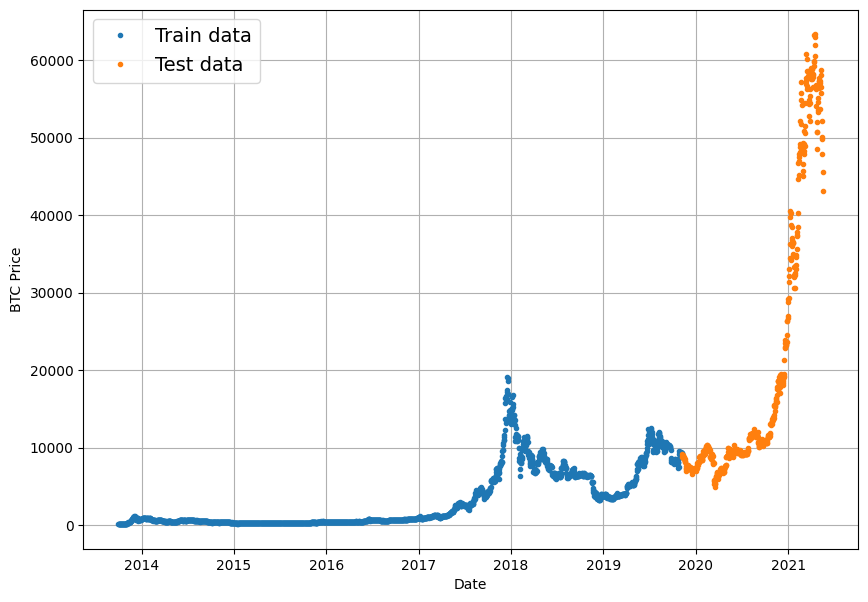

In [15]:
# Test out plotting function
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train,values=y_train, label="Train data")
plot_time_series(timesteps=X_test,values=y_test, label="Test data")

## Modelling Experiments

We've got some Bitcoin historical data, to model it, let's run some series of modelling experiments and see which model performs best.

## Modelling Experiments

We can build almost any kind of model for our problem as long as the data inputs and outputs are formatted correctly.

However, just because we *can* build *almost any* kind of model, doesn't mean it'll perform well/should be used in a production setting.

We'll see what this means as we build and evaluate models throughout.

Before we discuss what modelling experiments we're going to run, there are two terms you should be familiar with, **horizon** and **window**.
  * **horizon** = number of timesteps to predict into future
  * **window** = number of timesteps from past used to predict **horizon**

For example, if we wanted to predict the price of Bitcoin for tomorrow (1 day in the future) using the previous week's worth of Bitcoin prices (7 days in the past), the horizon would be 1 and the window would be 7.

Now, how about those modelling experiments?

| Model Number | Model Type | Horizon size | Window size | Extra data |
| ----- | ----- | ----- | ----- | ----- |
| 0 | Naïve model (baseline) | NA | NA | NA |
| 1 | Dense model | 1 | 7 | NA |
| 2 | Same as 1 | 1 | 30 | NA |
| 3 | Same as 1 | 7 | 30 | NA |
| 4 | Conv1D | 1 | 7 | NA |
| 5 | LSTM | 1 | 7 | NA |
| 6 | Same as 1 (but with multivariate data) | 1 | 7 | Block reward size |
| 7 | [N-BEATs Algorithm](https://arxiv.org/pdf/1905.10437.pdf) | 1 | 7 | NA |
| 8 | Ensemble (multiple models optimized on different loss functions) | 1 | 7 | NA |
| 9 | Future prediction model (model to predict future values) | 1 | 7 | NA|
| 10 | Same as 1 (but with turkey 🦃 data introduced) | 1 | 7 | NA |

> 🔑 **Note:** To reiterate, as you can see, we can build many types of models for the data we're working with. But that doesn't mean that they'll perform well. Deep learning is a powerful technique but it doesn't always work. And as always, start with a simple model first and then add complexity as needed.

## Modal 0: Naive forecast (baseline) modal

The formula looks like this:

$$\hat{y}_{t} = y_{t-1}$$

In English:
> The prediction at timestep t (y-hat) is equal to the value at timestep t-1 (previous timestep) - this is for a horizon of 1

In [16]:
# Create a naive forecast
naive_forecast = y_test[:-1]

naive_forecast[:10], naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

In [17]:
y_test[-10:]

array([58788.20967893, 58102.19142623, 55715.54665129, 56573.5554719 ,
       52147.82118698, 49764.1320816 , 50032.69313676, 47885.62525472,
       45604.61575361, 43144.47129086])

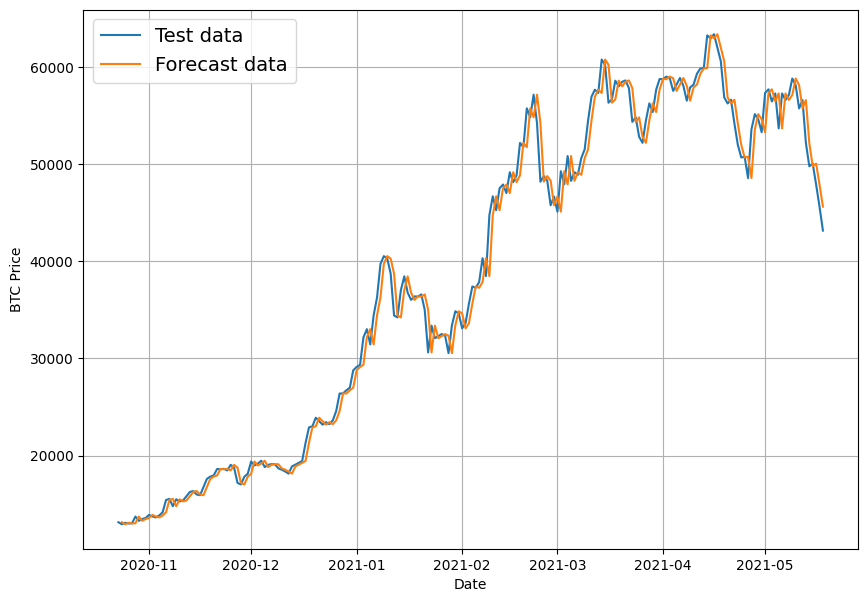

In [18]:
# Plot naive forecast
plt.figure(figsize=(10, 7))
# plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, start=350, format="-", label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", start=350, label="Forecast data")

## Evaluating a time series model

Let's look into some evaluation for time series

What are we doing?

We're predicting a number, so that means we have a form of a regression problem.

Because we're working on a regression problem, we'll need som regression-like metrics

A few common regression metrics (which can also be used for time series forecasting):
* MAE - Mean Absolute Error
* MSE - Mean Squared Error
* RMSE - Root Mean Squared Error
* MAPE/sMAPE - (symmetric) Mean Absolute Percentage Error
* MASE - Mean Absolute Percentage Error

For all of the above metrics, `lower is better`, for example an MAE of 0 is better than MAE of 100

The main thing we've evaluating here is: **how do our model's forecasts (y_pred) compare against the actual values (y_true or ground truth values)**

In [19]:
import tensorflow as tf

In [20]:
# MASE implementation
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data)
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))
  # Find MAE of naive forecast (so seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonalitu is 1 day (hence the shift of one)

  return mae / mae_naive_no_season

In [21]:
mean_absolute_scaled_error(y_true=y_test[1:], y_pred=naive_forecast).numpy()

0.9995699939182624

In [22]:
# Create a function to take in model [redoctopms amd truth values and return evaluation metrics
def evaluate_preds(y_true, y_pred):
  # Make sure float32 datatype (for metric calculation )
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various evaluation metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

That's one good looking evaluation function!

Let's now see if it works

In [23]:
naive_results = evaluate_preds(y_true=y_test[1:], y_pred=naive_forecast)
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

In [24]:
tf.reduce_mean(y_test).numpy()

20056.632963737222

In [25]:
tf.reduce_min(y_test).numpy(), tf.reduce_max(y_test).numpy()

(4944.7023359837, 63346.7890351052)

## Other models we can use for baselines and for actual forcasts

In this notebook, we're focused on TensorFlow and deep learning models.

However there are plenty of other styles of time series forecasting models we can do experiments with. such as:

* Moving average
* ARIMA (Autoregression Integrated Moving Average)
* sktime (Scikit-Learn for time series)
* TensorFlow Decision Forests (random forest, gradient boosting trees)
* Facebook Kats (purpose-built forecasting and time series analysis library by Facebook)
* LinkedIn Greykite (flexible, intuitive and fast forecast)

### Format Data Part 2: Windowing our dataset

Why do we window?

We window our timme series dataset to turn our data into a supervised learning problem.

```
[0, 1, 2, 3, 4, 5, 6] -> [7]
[1, 2, 3, 4, 5, 6, 7] -> [8]
[2, 3, 4, 5, 6, 7, 8] -> [9]
```

In [26]:
len(y_train)

2229

In [27]:
# What we want to with out Bitcoin data
print(f"We want to use: {btc_price[:7]} to predict this: {btc_price[7]}")

We want to use: [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795] to predict this: 123.033


In [28]:
btc_price[:10]

[123.65499,
 125.455,
 108.58483,
 118.67466,
 121.33866,
 120.65533,
 121.795,
 123.033,
 124.049,
 125.96116]

In [29]:
# Let's setup global varaibles for window and horizon size
HORIZON = 1 # Predict next 1 day
WINDOW_SIZE = 7 # use the past week of Bitcoin data to make the prediction

In [30]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=1):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1 (default)
  Input: [1, 2, 3, 4, 5, 6] -> Output: ([1, 2, 3, 4, 5], [6])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [31]:
# Test out the window labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8), axis=0))
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [0 1 2 3 4 5 6] -> Label: 7


We've got a way to label our windowed data.

However, this only works on a small scale.

We need a way to do the above across our entire time series.

We could do this with python for loops, however, for large time series, that'd be quite slow. To speed things up, we'll leverage NumPy's array indexing.

Our function will:
1. Create a window step of specific window size (e.g. [0, 1, 2, 3, 4, 5, 6])
2. Use Numpy indexing to create a 2D array of multiple window steps, for example:
```
[
  [0, 1, 2, 3, 4, 5, 6],
  [1, 2, 3, 4, 5, 6, 7],
  [2, 3, 4, 5, 6, 7, 8]
]
```
3. Uses th4 2D array of multiple window steps (from 2.) to index on a target series (e. g. the historical price of Bitcoin)
4. Uses our `get_labelled_windows()` function we created above to turn the window steps into windows with a specified horizon.

In [32]:
# Create function to view NumPy arrays as windows
def make_windows(x, window_size=7, horizon=1):
  """
  Turns a 1D array into a 2D array of sequential windows of window_size.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(f"Window step:\n {window_step}")

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  # 3. Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [33]:
full_windows, full_labels =  make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [34]:
# View the first 3 Windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Horizon: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Horizon: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Horizon: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Horizon: [125.96116]


In [35]:
# View the last 3 Windows/labels
for i in range(3):
  print(f"Window: {full_windows[i - 3]} -> Horizon: {full_labels[i - 3]}")

Window: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> Horizon: [47885.62525472]
Window: [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> Horizon: [45604.61575361]
Window: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> Horizon: [43144.47129086]


🔑 **Note:** There's a function which does similar to the above in http://tf.keras.preprocessing.timeseries_dataset_from_array

## Turing windows into training and test sets

In [36]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * (1 - test_split)) # this will default to 80% train / 20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [37]:
# Create train and test windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [38]:
train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [39]:
test_windows[:5], test_labels[:5]

(array([[9290.89660239, 9202.41545055, 9369.62808116, 9326.59962378,
         9335.75240233, 9226.48582088, 8794.35864452],
        [9202.41545055, 9369.62808116, 9326.59962378, 9335.75240233,
         9226.48582088, 8794.35864452, 8798.04205463],
        [9369.62808116, 9326.59962378, 9335.75240233, 9226.48582088,
         8794.35864452, 8798.04205463, 9081.18687849],
        [9326.59962378, 9335.75240233, 9226.48582088, 8794.35864452,
         8798.04205463, 9081.18687849, 8711.53433917],
        [9335.75240233, 9226.48582088, 8794.35864452, 8798.04205463,
         9081.18687849, 8711.53433917, 8760.89271814]]),
 array([[8798.04205463],
        [9081.18687849],
        [8711.53433917],
        [8760.89271814],
        [8749.52059102]]))

In [40]:
# Check to see if train labels are the same (before and after window split)
np.array_equal(np.squeeze(train_labels[:-HORIZON - 1]), y_train[WINDOW_SIZE:])

True

## Make a Modelling checkpoint callback

Because our model's performance will fluctuate from experiment to experiment, we're going to write a model checkpoint so we compare apples to apples.

More specifically, we want to compare each pf our model's best performances against the other model's best performane.

For example, if our model performs the best on epoch 55 (but we're training for 100 epochs), we want to load and evaluate the model saved on epoch 55.

In [41]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            monitor="val_loss",
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True)

## Model 1: Dense model (window = 7, horizon = 1)

Our first deep model is going to be a simple dense model:
* A single dense layer with 128 hidden units and RelU activation
* An output layer with liner activation (no activation)
* Adam optimization and MAE loss function
* Batch size of 128 (previously we've used 32)
* 100 epochs

Why these values?

I Picked them out of experimentaion.

* **Hyperparameters** = values a machine learning pactitioner can adjust themselves.
* **Parameters** = Values a model learns on its own.

In [42]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# 1. Construct model
model_1 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON, activation="linear") # linear activation is the same as having no activation
], name="model_1_dense") # name our model so we can save it

# 2. Compile
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

# 3. Fit the model
model_1.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
18/18 [==============================] - 2s 45ms/step - loss: 3520.2732 - mae: 3520.2732 - mse: 32266948.0000 - val_loss: 10216.4854 - val_mae: 10216.4854 - val_mse: 185589104.0000
Epoch 2/100
18/18 [==============================] - 0s 25ms/step - loss: 624.9638 - mae: 624.9638 - mse: 1415507.0000 - val_loss: 2566.7974 - val_mae: 2566.7974 - val_mse: 15720842.0000
Epoch 3/100
18/18 [==============================] - 0s 26ms/step - loss: 269.2279 - mae: 269.2279 - mse: 290324.6250 - val_loss: 1106.8649 - val_mae: 1106.8649 - val_mse: 4080893.2500
Epoch 4/100
18/18 [==============================] - 0s 27ms/step - loss: 206.0378 - mae: 206.0378 - mse: 216382.5781 - val_loss: 1025.0181 - val_mae: 1025.0181 - val_mse: 3471582.5000
Epoch 5/100
18/18 [==============================] - 1s 39ms/step - loss: 180.6230 - mae: 180.6230 - mse: 171334.7656 - val_loss: 980.5314 - val_mae: 980.5314 - val_mse: 3227237.7500
Epoch 6/100
18/18 [==============================] - 0s 25ms/step -

In [43]:
# Evaluate model on test data
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 695.2020 - mae: 695.2020 - mse: 1443208.3750


[695.2019653320312, 695.2019653320312, 1443208.375]

In [44]:
# Load in saved best performing model_1 and evaluate it on test data
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense/")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 571.2822 - mae: 571.2822 - mse: 1181301.3750


[571.2822265625, 571.2822265625, 1181301.375]

## Making forecast with a model (on the test dataset)

To make `forecasts` on the test dataset (note: these won't be actual forecasts, they're only psuedo forecasts because actual forecasts are into the future), let's wirte a function to:

1. Take in a trained model
2. Takes in some input data (same kind of data the model was trained on)
3. Passes the input to the model's `predict()` method
4. Returns the predictions

In [45]:
def make_preds(model, input_data):
  """
  Uses model to make predictions input_data
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of prediction

In [46]:
# Make predictions using model_1 on the test dataset and view results
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

18/18 [==============================] - 0s 1ms/step


(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8845.151, 8756.245, 8996.08 , 8769.66 , 8739.765, 8743.   ,
        8631.583, 8550.832, 8432.034, 8509.237], dtype=float32)>)

In [47]:
test_labels = test_labels.reshape((len(test_labels), 1))

In [48]:
# Evaluate preds
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels), y_pred=model_1_preds)
model_1_results

{'mae': 571.28217,
 'mse': 1181301.2,
 'rmse': 1086.8768,
 'mape': 2.582189,
 'mase': 1.0035845}

In [49]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

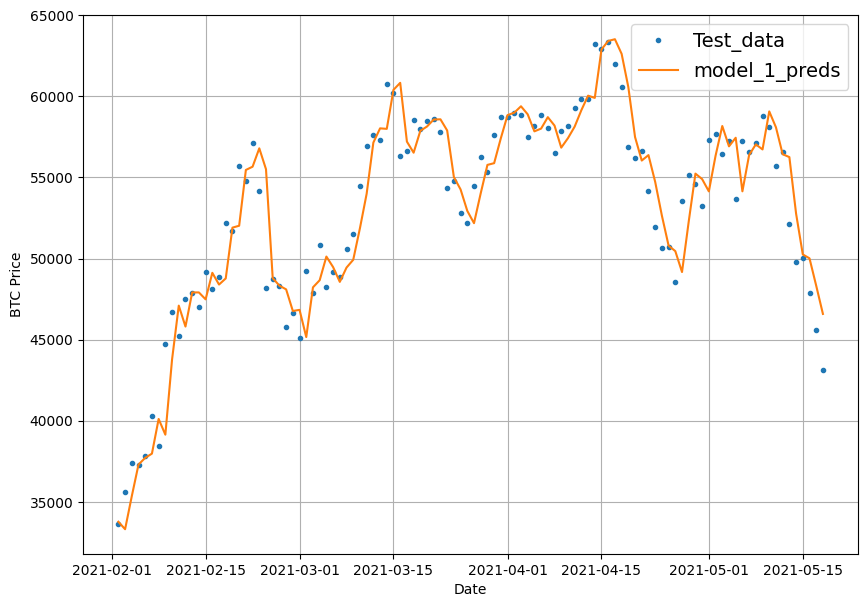

In [50]:
# Let's plot our model 1 prediction
offset = 450
plt.figure(figsize=(10, 7))
# Account for the test window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")

plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, start=offset, format="-", label="model_1_preds")

## Model 2: Dense (window = 30, horizon = 1)

In [51]:
HORIZON = 1 # predict one step at a time (one day of Bitcoin prices)
WINDOW_SIZE = 30 # use 30 timesteps in past

In [52]:
len(full_windows), len(full_labels)

(2780, 2780)

In [53]:
# Make window data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2757, 2757)

In [54]:
# Make train and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2205, 552, 2205, 552)

In [55]:
train_windows[:3], train_labels[:3]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
         126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
         152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166,
         180.355  , 175.03166, 177.6965 , 187.15983, 192.75666, 197.4    ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  , 124.049  , 125.96116, 125.27966, 125.9275 , 126.38333,
         135.24199, 133.20333, 142.76333, 137.92333, 142.95166, 152.55183,
         160.33883, 164.31499, 177.63333, 188.29716, 200.70166, 180.355  ,
         175.03166, 177.6965 , 187.15983, 192.75666, 197.4    , 196.02499],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  , 125.96116, 125.27966, 125.9275 , 126.38333, 135.24199,
         133.20333, 142.76333, 137.92333, 142.95166, 152.55183, 160.33883,
         164.31499, 177

In [56]:
tf.random.set_seed(42)

# Create model (same model as model 1 but data input will be different)
model_2 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON) # need to predict horizon number of steps into the future
], name="model_2_dense")

model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

In [57]:
# Evaluate modedl 2 on test data
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 629.6978


629.6978149414062

In [58]:
# Load in the best performing model
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense")
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 625.0558


625.0558471679688

In [59]:
test_labels.shape

(552, 1)

In [60]:
# Get forecase prediction
model_2_preds = make_preds(model_2, input_data=test_windows)

18/18 [==============================] - 0s 1ms/step


In [61]:
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels), # remove 1 dimension of test labels
                                 y_pred=model_2_preds)
model_2_results

{'mae': 625.05585,
 'mse': 1403769.0,
 'rmse': 1184.8076,
 'mape': 2.8352416,
 'mase': 1.0926038}

In [62]:
model_1_results

{'mae': 571.28217,
 'mse': 1181301.2,
 'rmse': 1086.8768,
 'mape': 2.582189,
 'mase': 1.0035845}

In [63]:
test_labels = test_labels.reshape((len(test_labels), 1))

In [64]:
test_labels.shape, X_test[-len(test_windows):].shape

((552, 1), (552,))

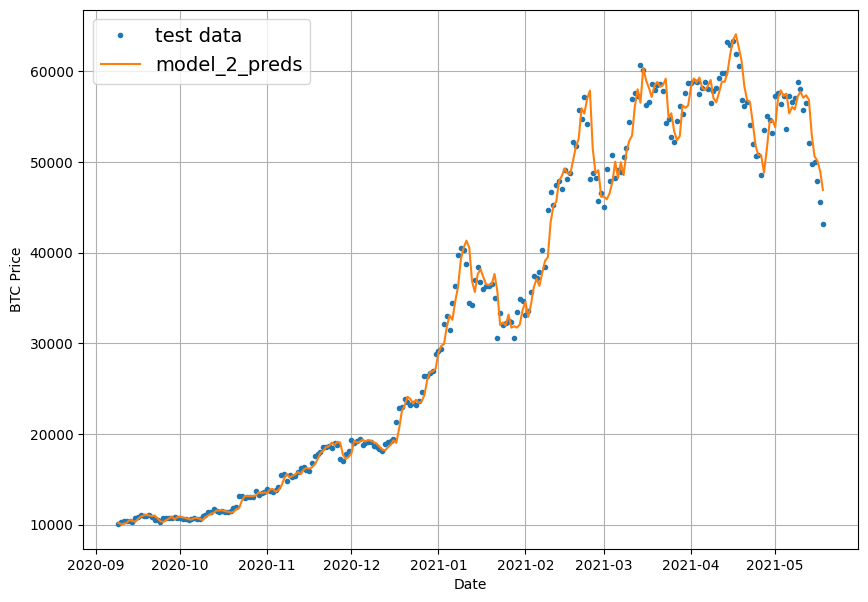

In [65]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for test window offset when plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="test data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset, format="-", label="model_2_preds")

## Model 3: Dense (window = 30, horizon = 7)

In [66]:
HORIZON = 7
WINDOW_SIZE = 30

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2751, 2751)

In [67]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels, test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

In [68]:
full_windows.shape ,full_labels.shape

((2751, 30), (2751, 7))

In [69]:
test_labels.shape

(551, 7)

In [70]:
tf.random.set_seed(42)

# Create model (same as model_1 except with different data input size)
model_3 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_3_dense")

model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

In [71]:
# Evaluate the model on the test data
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1357.5970


1357.5970458984375

In [72]:
# Load in best version of model_3 and evaluate
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense/")
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1241.9596


1241.9595947265625

In [73]:
# The predictions are going to be 7 steps at a time (this is the HORIZON size)
model_3_preds = make_preds(model_3,
                           input_data=test_windows)
model_3_preds[:5]

18/18 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[9493.715 , 9513.138 , 9734.45  , 9316.382 , 9644.566 , 9533.724 ,
        9863.474 ],
       [9027.209 , 9311.876 , 9412.574 , 9014.143 , 9186.836 , 9211.156 ,
        9568.823 ],
       [8841.54  , 9012.6045, 9237.704 , 9031.457 , 9039.188 , 9030.514 ,
        9319.984 ],
       [9017.134 , 9004.495 , 9180.242 , 9268.195 , 9232.221 , 9154.423 ,
        9280.275 ],
       [8850.734 , 8858.2295, 8971.174 , 9201.684 , 9253.576 , 9016.707 ,
        9141.043 ]], dtype=float32)>

In [74]:
model_3_preds.shape, model_2_preds.shape, model_1_preds.shape

(TensorShape([551, 7]), TensorShape([552]), TensorShape([556]))

In [75]:
test_labels.shape

(551, 7)

In [76]:
# Calculate model_3 results - these are going to be multi-dimensional because
# we're trying to predict more than one step at a time.
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': array([  792.4205  ,   496.26102 ,   437.46805 ,   535.8319  ,
          487.53043 ,   579.82794 ,   704.5399  ,   696.478   ,
          655.6474  ,   617.847   ,   791.22675 ,   858.642   ,
          960.44977 ,  1022.8823  ,   668.18536 ,   229.81863 ,
          206.04471 ,   207.66232 ,   228.64934 ,   255.19978 ,
          170.70299 ,   209.4089  ,   329.41385 ,   385.6423  ,
          215.32457 ,   153.31627 ,   109.06696 ,   150.05852 ,
          198.04861 ,   244.83398 ,   338.98648 ,   461.1594  ,
          443.0847  ,   420.88736 ,   351.88287 ,   360.2774  ,
          366.4156  ,   256.62717 ,   235.83488 ,   154.809   ,
          363.648   ,    96.198105,    89.579384,   106.311874,
          184.39    ,   140.96973 ,   147.4952  ,   142.63713 ,
          165.5376  ,   139.28752 ,   121.89495 ,   211.21834 ,
          270.09283 ,   202.41246 ,   220.70598 ,   322.2814  ,
          460.62695 ,   462.82953 ,   451.66245 ,   491.47006 ,
          261.0427  ,   190.87096

# Make our evaluation function work for larger horizon

In [77]:
# Create a function to take in model [redoctopms amd truth values and return evaluation metrics
def evaluate_preds(y_true, y_pred):
  # Make sure float32 datatype (for metric calculation )
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various evaluation metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, we want to reduce metrics to a single value)
  if mae.ndim > 0 :
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [78]:
# Get model_3 results aggregated to single values
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': 1241.9596,
 'mse': 5480451.5,
 'rmse': 1430.5752,
 'mape': 5.6661463,
 'mase': 2.209998}

We've made and evaluated predictions with `model_3` let's visualize, visualize and visualize!

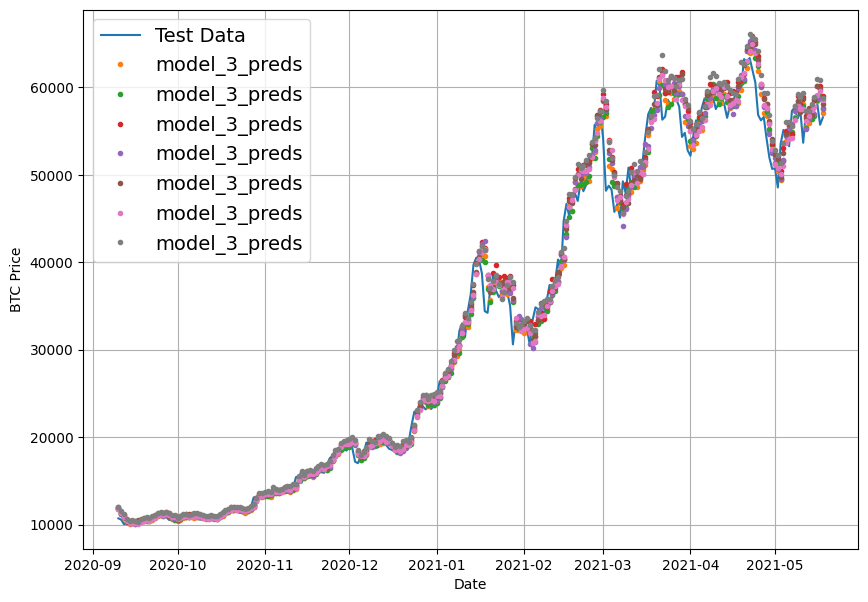

In [79]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset,format="-", label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_3_preds, start=offset, label="model_3_preds")

In [80]:
model_3_preds[0]

<tf.Tensor: shape=(7,), dtype=float32, numpy=
array([9493.715, 9513.138, 9734.45 , 9316.382, 9644.566, 9533.724,
       9863.474], dtype=float32)>

In [81]:
tf.reduce_mean(model_3_preds[0])

<tf.Tensor: shape=(), dtype=float32, numpy=9585.635>

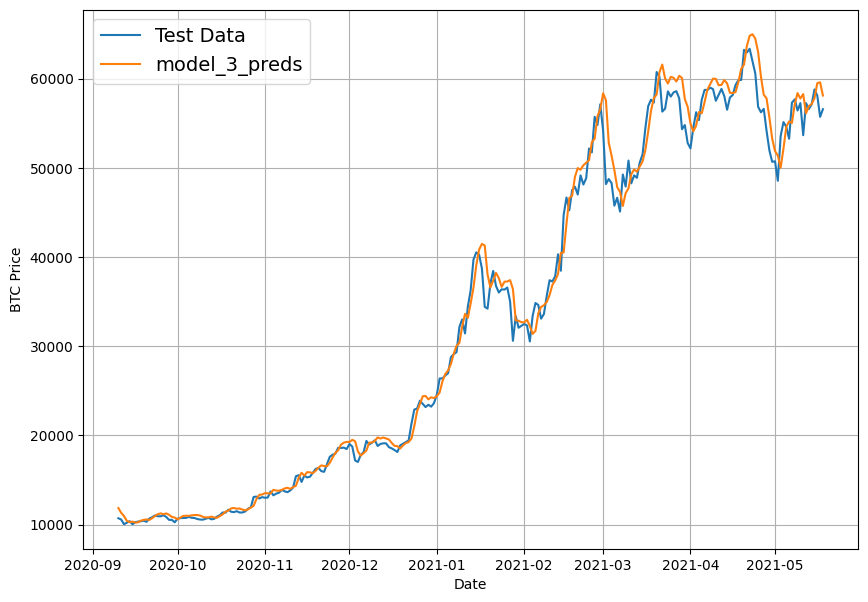

In [82]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset,format="-", label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=tf.reduce_mean(model_3_preds, axis=1), start=offset, format="-", label="model_3_preds")

## Which of our modedls is performing the best so far?

So we've trained a few models, now let's compare them and see how they've gone

<Axes: >

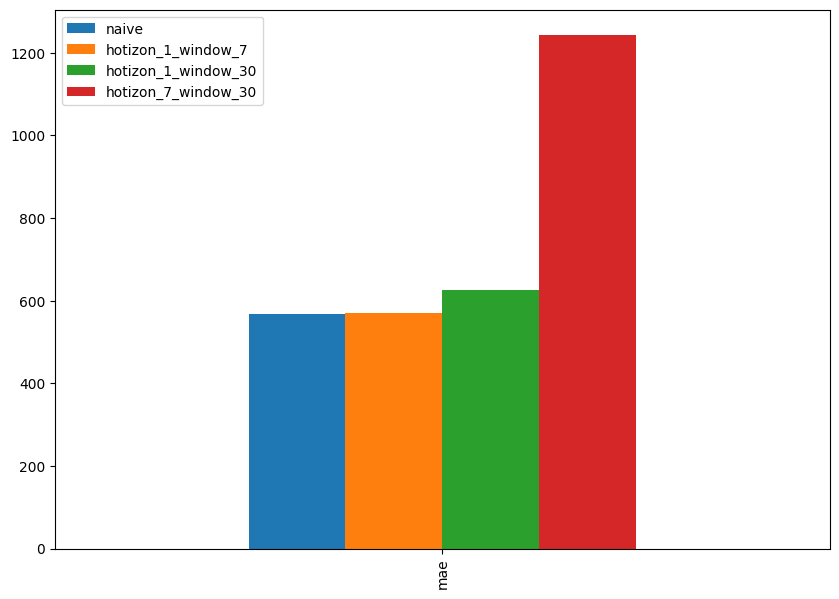

In [83]:
pd.DataFrame({
    "naive": naive_results["mae"],
    "hotizon_1_window_7": model_1_results["mae"],
    "hotizon_1_window_30": model_2_results["mae"],
    "hotizon_7_window_30": model_3_results["mae"],
}, index=["mae"]).plot(figsize=(10, 7), kind="bar")

## Model 4: Conv1D

In [84]:
HORIZON = 1 # Predict next day of bitcoin prices
WINDOW_SIZE = 7 # use previous week worth of data

# Create windowed data
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [85]:
# Create train/test sets
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

To use the Conv1D layer, we need an input shape of: `(batch_size, timesteps, input_dim)...`

However our data isn't in that shape yet

In [86]:
# Check data input shape
train_windows[0].shape # returns (WINDOW_SIZE, )

(7,)

In [87]:
# Before we pass our data to the Conv1D layer, we have to reshape it in order to make sure it works
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [88]:
expand_dims_layers = layers.Lambda(lambda X: tf.expand_dims(x, axis=1)) # add an extra dimension for `input_dim`

In [89]:
# Test our lamda layer
print(f"Orignal shape: {x.shape}") # (WINDOW_SIZE)
print(f"Expanded shape: {expand_dims_layers(x).shape}") # Output
print(f"Orignal values with expanded shape:\n {expand_dims_layers(x)}")

Orignal shape: (7,)
Expanded shape: (7, 1)
Orignal values with expanded shape:
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [90]:
tf.random.set_seed(42)

# Create Conv1D
model_4 = tf.keras.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    layers.Conv1D(filters=128, kernel_size=5, strides=1, padding='causal', activation="relu"),
    layers.Dense(HORIZON)
], name="model_4_conv1D")

# Compile model
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_4.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=1,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])


Epoch 1/100
18/18 [==============================] - 3s 75ms/step - loss: 1519.9979 - val_loss: 1902.1672
Epoch 2/100
18/18 [==============================] - 0s 5ms/step - loss: 363.4202 - val_loss: 1934.1774
Epoch 3/100
18/18 [==============================] - 1s 36ms/step - loss: 224.8277 - val_loss: 1331.4119
Epoch 4/100
18/18 [==============================] - 1s 31ms/step - loss: 195.1127 - val_loss: 1112.6229
Epoch 5/100
18/18 [==============================] - 1s 31ms/step - loss: 190.1432 - val_loss: 1077.2621
Epoch 6/100
18/18 [==============================] - 1s 31ms/step - loss: 187.1824 - val_loss: 1053.8203
Epoch 7/100
18/18 [==============================] - 1s 32ms/step - loss: 183.5295 - val_loss: 1014.9102
Epoch 8/100
18/18 [==============================] - 1s 30ms/step - loss: 179.0256 - val_loss: 998.1089
Epoch 9/100
18/18 [==============================] - 0s 6ms/step - loss: 174.9037 - val_loss: 1000.3943
Epoch 10/100
18/18 [==============================] - 1s 

In [91]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4737 (18.50 KB)
Trainable params: 4737 (18.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [92]:
# Evaluate model
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 5ms/step - loss: 691.7330


691.7330322265625

In [93]:
# Load back in best performing Conv1D and re-evaluate
model_4 = tf.keras.models.load_model("model_experiments/model_4_conv1D/")
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 567.6570


567.656982421875

In [94]:
# Make predictions
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8837.221 , 8749.917 , 8965.396 , 8755.221 , 8718.968 , 8687.621 ,
       8651.612 , 8504.7295, 8420.528 , 8486.808 ], dtype=float32)>

In [95]:
# Evaluate predictions
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels), y_pred=model_4_preds)
model_4_results

{'mae': 567.6569,
 'mse': 1163819.2,
 'rmse': 1078.8046,
 'mape': 2.5531354,
 'mase': 0.997216}

### Model 5: RNN (LSTM)

Let's build an RNN model for our time series data

We'll use data as we created previously.

In [96]:
tf.random.set_seed(42)

 # Let's build an LSTM model with the Functional API
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
# x = layers.LSTM(128, return_sequences=True)(x)
x = layers.LSTM(128, activation="relu")(x)
# x = layers.Dense(32, activation="relu")(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=output, name="model_5_LSTM")

# Compile
model_5.compile(loss="mae", optimizer=tf.keras.optimizers.Adam())

# Fit
model_5.fit(train_windows,
             train_labels,
             epochs=100,
             verbose=1,
             batch_size=128,
             validation_data=(test_windows, test_labels),
             callbacks=[create_model_checkpoint(model_name=model_5.name)])


Epoch 1/100
18/18 [==============================] - 3s 97ms/step - loss: 2332.3779 - val_loss: 9619.3467
Epoch 2/100
18/18 [==============================] - 1s 87ms/step - loss: 644.2378 - val_loss: 1721.4895
Epoch 3/100
18/18 [==============================] - 2s 117ms/step - loss: 224.0752 - val_loss: 1239.9246
Epoch 4/100
18/18 [==============================] - 1s 85ms/step - loss: 178.2211 - val_loss: 1003.8192
Epoch 5/100
18/18 [==============================] - 2s 106ms/step - loss: 172.7408 - val_loss: 971.7977
Epoch 6/100
18/18 [==============================] - 1s 85ms/step - loss: 170.2077 - val_loss: 955.9080
Epoch 7/100
18/18 [==============================] - 1s 84ms/step - loss: 171.9870 - val_loss: 939.1963
Epoch 8/100
18/18 [==============================] - 1s 83ms/step - loss: 166.7362 - val_loss: 932.1153
Epoch 9/100
18/18 [==============================] - 0s 6ms/step - loss: 165.3690 - val_loss: 938.2437
Epoch 10/100
18/18 [==============================] - 1s 8

In [97]:
# Load in best version of model 5 and evaluate on the test data
model_5 = tf.keras.models.load_model("model_experiments/model_5_LSTM")
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 583.7629


583.7628784179688

In [98]:
# Make prediction with out LSTM model
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:5]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8916.475, 8800.793, 8945.366, 8773.515, 8772.222], dtype=float32)>

In [99]:
# Evaluate model 5 prediction
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels), y_pred=model_5_preds)
model_5_results

{'mae': 583.7629,
 'mse': 1213999.2,
 'rmse': 1101.8163,
 'mape': 2.6254299,
 'mase': 1.0255097}

In [100]:
model_1_results

{'mae': 571.28217,
 'mse': 1181301.2,
 'rmse': 1086.8768,
 'mape': 2.582189,
 'mase': 1.0035845}

🔑**Note:** Because neural network are such powerful algorithms, they can be used for almost any problem, however, that doesn't mean they'll achieve performant or useable result. You're probably starting to clue onto this now.

## Make a multivariate time series dataset

Before we add a feature to our time series, what is a feature we can use?

One feature we could add is whether or not Elon Musk tweeted on that day...
* day 1 - 0
* day 2 - 1
* day 3 - 0

what's a better feature to use?

How about bitcoin halving events?

https://www.cmcmarkets.com/en-nz/learn-cryptocurrencies/bitcoin-halving

In [101]:
# Let's make a multivariate time series
bitcoin_prices.head()

,price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [102]:
# Let's add the bitcoin halving events to our dataset
block_reward_1 = 50 # 3 January 2009 - this block reward isn't in our dataset (our data starts from 01 October 2013)
block_reward_2 = 25 # 28 November 2012
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 18 May 2020

# Block reward dates
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")

In [103]:
# Create date ranges of where specific block_reward values should be
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days

(1012, 2421)

In [104]:
# Add in a block_reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

# Add in block_reward values as a feature to our dataframe
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days : block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4

In [105]:
bitcoin_prices_block.head()

,price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


In [106]:
bitcoin_prices_block.tail()

,price,block_reward
Date,,
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25
2021-05-17,45604.615754,6.25
2021-05-18,43144.471291,6.25


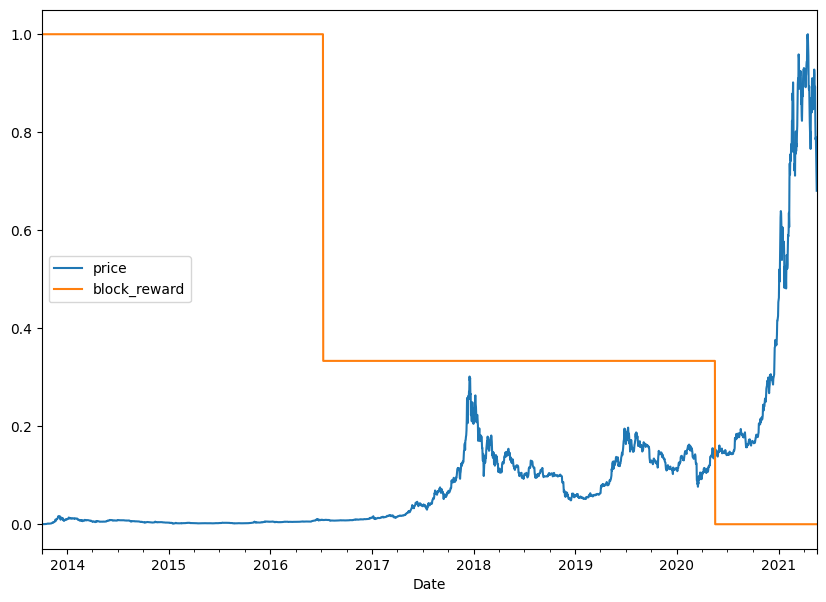

In [107]:
# Plot the block reward vs price over time
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["price", "block_reward"]]),
                                     columns=bitcoin_prices_block.columns,
                                     index=bitcoin_prices_block.index)

scaled_price_block_df.plot(figsize=(10, 7));

## Making a windowed dataset with pandas

Previously, we've turned out univariate time series into windowed dataset using the helper functions above.

However, since we've got multivariate data, these functions won't work.

Not to worry, we can use the pandas.DataFrame.shift() method to window our multivariate data.

In [112]:
# Setup dataset hyperparameters
HORIZON = 1
WINDOW_SIZE = 7

In [126]:
# Make a copy of the Bitcoin historical data with block reward feature
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Add windowed columns
for i in range(WINDOW_SIZE): # shift values for each step in WINDOW_SIZE
  bitcoin_prices_windowed[f"price+{i+1}"] = bitcoin_prices_windowed["price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,price,block_reward,price+1,price+2,price+3,price+4,price+5,price+6,price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


What we've done is created a way to window our dataset directly from a pandas dataframe.

```
[0, 1, 2, 3, 4, 5, 6, block_reward] -> [7]
[1, 2, 3, 4, 5, 6, 7, block_reward] -> [8]
[1, 2, 3, 4, 5, 6, 8, block_reward] -> [9]
```

In [127]:
# Create X (windoes) and y (horizon) features
X = bitcoin_prices_windowed.dropna().drop("price", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["price"].astype(np.float32)
X.head()

,block_reward,price+1,price+2,price+3,price+4,price+5,price+6,price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [129]:
# Make train and test sets using indexing
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]

len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)